In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image, Radar
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import matplotlib.gridspec as gridspec
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os
from unidecode import unidecode


# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
hcol = '#ff4b44'
acol = '#00a0de'

In [3]:
# URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
URL4 = "file:///C:/Fonts/Roboto-Thin%20-%20Copy.html"
robotto_thin = FontManager(URL4)

In [4]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

In [5]:
df_shots = pd.read_csv("D:\FData\LaLiga_2023-24\LaLiga2023_24_all_shots.csv")

In [6]:
df = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL_2023_2024GW01_to_GW38.csv")

In [7]:
df_shots = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL2023_24_All_Shots.csv")

# Creativity

In [8]:
player_1 = 'Gabriel Martinelli'
player_1_xA = 5.2
player_1_nts = 22.4

player_2 = 'Leandro Trossard'
player_2_xA = 3.2
player_2_nts = 18.3

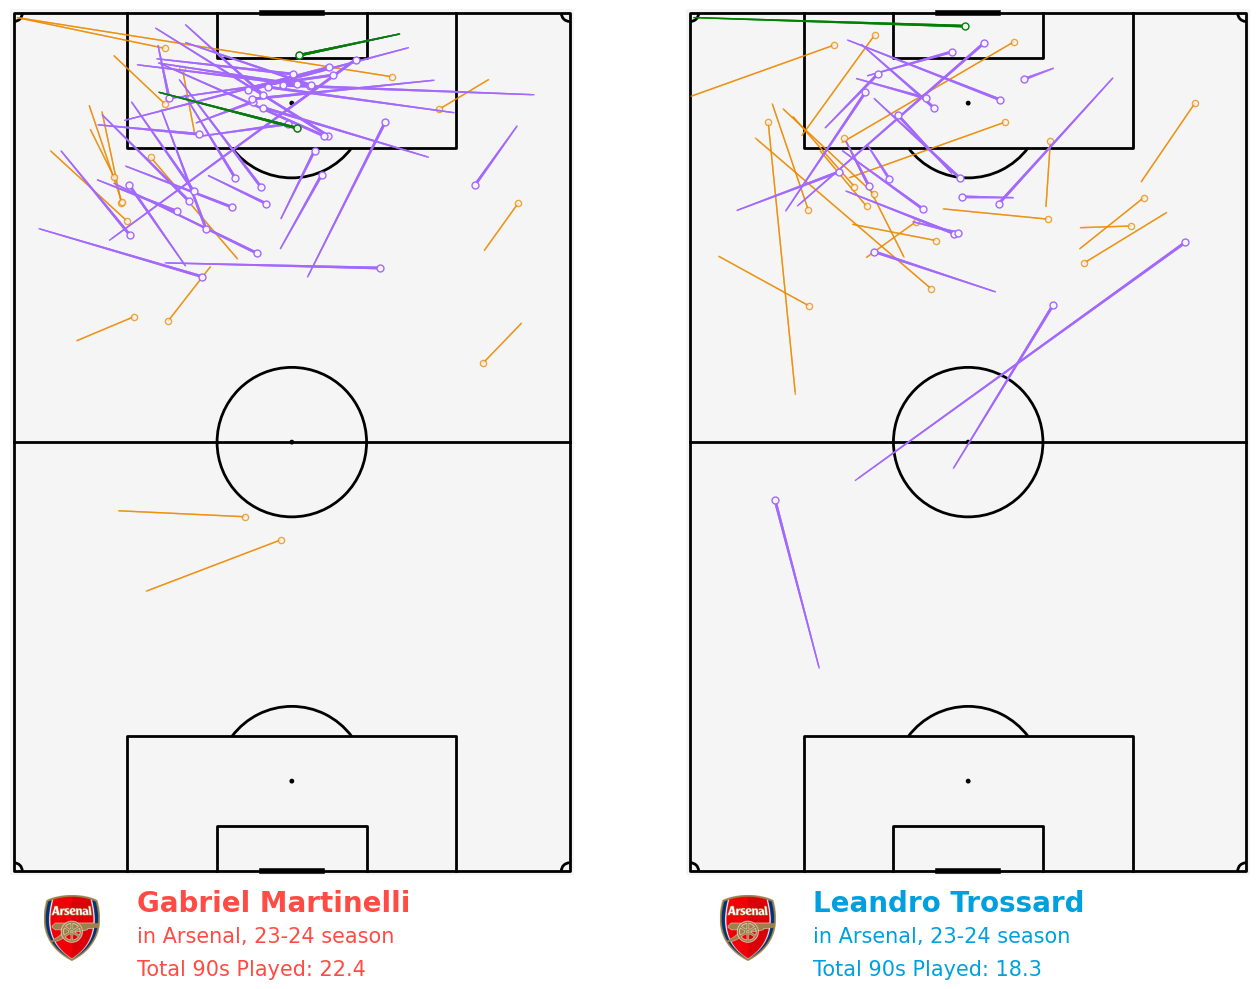

In [9]:
def creativity(ax, pname, xol, xA, nts):
    df_player = df[(df['name']==pname)]
    dfpass = df[(df['type']=='Pass') & (df['name']==pname)]
    acc_pass = dfpass[dfpass['outcomeType']=='Successful']
    Thr_ball = dfpass[(dfpass['qualifiers'].str.contains('Throughball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Thr_ball_acc = Thr_ball[Thr_ball['outcomeType']=='Successful']
    Crs_pass = dfpass[(dfpass['qualifiers'].str.contains('Cross')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Crs_pass_acc = Crs_pass[Crs_pass['outcomeType']=='Successful']
    key_pass = df_player[df_player['qualifiers'].str.contains('KeyPass')]
    op_kp = key_pass[~key_pass['qualifiers'].str.contains('CornerTaken|Freekick')]
    big_chnc = df_player[df_player['qualifiers'].str.contains('BigChanceCreated')]
    df_no_carry = df[df['type']!='Carry'].reset_index(drop=True)
    pre_asst = df_no_carry[(df_no_carry['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist')) & (df_no_carry['type']=='Pass') & 
                           (df_no_carry['outcomeType']=='Successful') &  (df_no_carry['name']==pname)]
    shot_buildup = df_no_carry[(df_no_carry['qualifiers'].shift(-1).str.contains('KeyPass')) & (df_no_carry['type']=='Pass') & 
                           (df_no_carry['outcomeType']=='Successful') &  (df_no_carry['name']==pname)]
    g_assist = dfpass[dfpass['qualifiers'].str.contains('IntentionalGoalAssist')]
    pen_box = acc_pass[(acc_pass['endX']>=88.5) & (acc_pass['endY']>=13.6) & (acc_pass['endY']<=54.4) & 
                       (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 68.5)
    ax.set_ylim(-0.5, 105.5)
    ax.invert_xaxis()

    pitch.lines(shot_buildup.x, shot_buildup.y, shot_buildup.endX, shot_buildup.endY, color='#ed8a00', lw=1, alpha=0.75,comet=True, zorder=3, ax=ax)
    pitch.lines(op_kp.x, op_kp.y, op_kp.endX, op_kp.endY, color=violet, lw=2, alpha=1, comet=True, zorder=4, ax=ax)
    pitch.lines(g_assist.x, g_assist.y, g_assist.endX, g_assist.endY, color='green', lw=2, alpha=1, comet=True, zorder=5, ax=ax)

    pitch.scatter(shot_buildup.endX, shot_buildup.endY, s=20, color=bg_color,  edgecolor= '#ed8a00',  alpha=0.75, zorder=3, ax=ax)
    pitch.scatter(op_kp.endX, op_kp.endY, s=25, color=bg_color,  edgecolor=violet, alpha=1, zorder=4, ax=ax)
    pitch.scatter(g_assist.endX, g_assist.endY, s=25, color=bg_color,  edgecolor= 'green', alpha=1, zorder=5, ax=ax)

    team_name = dfpass['teamName'].max()
    position = dfpass['position'].max()
    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(-7, 61, image, height=8, ax=ax)
    ax.text(53, -4, f'{pname}', color=xol, fontsize=20, fontweight='bold', ha='left', va='center')
    ax.text(53, -8, f'in {team_name}, 23-24 season', color=xol, fontsize=15, ha='left', va='center')
    ax.text(53, -12, f'Total 90s Played: {nts}', color=xol, fontsize=15, ha='left', va='center')
    
    return {
        'Name': pname,
        'Chances Created_t': len(key_pass),
        'Openplay Chances Created_t': len(op_kp),
        'Big Chances Created_t': len(big_chnc),
        'Assists_t': len(g_assist),
        'Pre Assists_t': len(pre_asst),
        'Buildup to Shots_t': len(shot_buildup),
        'Accurate Crosses_t': len(Crs_pass_acc),
        'Through Pass Attempts_t': len(Thr_ball),
        'Passes Into Penalty Area_t': len(pen_box),
        'xA_t': xA,
        '90s': nts
    }

fig,axs=plt.subplots(1,2, figsize=(16,12))
stats1 = creativity(axs[0], player_1, hcol, player_1_xA, player_1_nts)
stats2 = creativity(axs[1], player_2, acol, player_2_xA, player_2_nts)

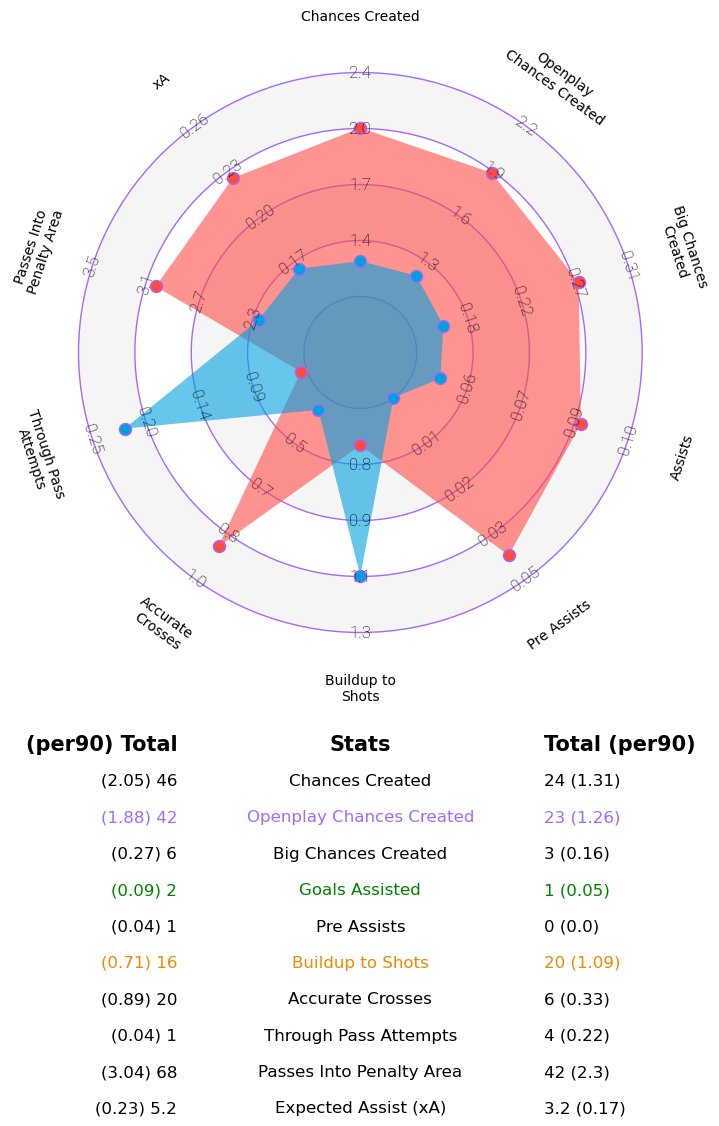

In [10]:
list1 = []
list1.append(stats1)
stats1_df = pd.DataFrame(list1)

list2 = []
list2.append(stats2)
stats2_df = pd.DataFrame(list2)

comp_df = pd.concat([stats1_df, stats2_df])

total_df = comp_df.copy()
total_df = total_df.T.reset_index(drop=False)
total_df.columns = total_df.iloc[0]
total_df = total_df[1:].reset_index(drop=True)

comp_df['Chances Created'] = (comp_df['Chances Created_t']/comp_df['90s']).round(2)
comp_df['Openplay Chances Created'] = (comp_df['Openplay Chances Created_t']/comp_df['90s']).round(2)
comp_df['Big Chances Created'] = (comp_df['Big Chances Created_t']/comp_df['90s']).round(2)
comp_df['Assists'] = (comp_df['Assists_t']/comp_df['90s']).round(2)
comp_df['Pre Assists'] = (comp_df['Pre Assists_t']/comp_df['90s']).round(2)
comp_df['Buildup to Shots'] = (comp_df['Buildup to Shots_t']/comp_df['90s']).round(2)
comp_df['Accurate Crosses'] = (comp_df['Accurate Crosses_t']/comp_df['90s']).round(2)
comp_df['Through Pass Attempts'] = (comp_df['Through Pass Attempts_t']/comp_df['90s']).round(2)
comp_df['Passes Into Penalty Area'] = (comp_df['Passes Into Penalty Area_t']/comp_df['90s']).round(2)
comp_df['xA'] = (comp_df['xA_t']/comp_df['90s']).round(2)

comp_df = comp_df[['Name', 'Chances Created', 'Openplay Chances Created', 'Big Chances Created', 'Assists', 'Pre Assists', 'Buildup to Shots',
                   'Accurate Crosses', 'Through Pass Attempts', 'Passes Into Penalty Area', 'xA']]

comp_df = comp_df.T.reset_index(drop=False)
comp_df.columns = comp_df.iloc[0]
comp_df = comp_df[1:].reset_index(drop=True)

params = comp_df['Name'].to_list()
stats_list1 = comp_df[player_1].to_list()
stats_list2 = comp_df[player_2].to_list()

# Initialize the low and high lists
low = []
high = []

# Iterate through both lists and populate low and high lists

for a, b in zip(stats_list1, stats_list2):
    if a < b:
        low.append(a-(a*.15))
        high.append(b+(b*.15))
    else:
        low.append(b-(b*.15))
        high.append(a+(a*.15))

def plot_radar(ax):
    radar = Radar(params, low, high, num_rings=4, ring_width=1, center_circle_radius=1)

    rings_inner = radar.draw_circles(ax=ax, facecolor='#f5f5f5', edgecolor=violet)
    radar_output = radar.draw_radar_compare(stats_list1, stats_list2, ax=ax,
                                        kwargs_radar={'facecolor': hcol, 'alpha': 0.6},
                                        kwargs_compare={'facecolor': acol, 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    ax.scatter(vertices1[:, 0], vertices1[:, 1], c=hcol, edgecolors=violet, marker='o', s=75, zorder=2)
    ax.scatter(vertices2[:, 0], vertices2[:, 1], c=acol, edgecolors=violet, marker='o', s=75, zorder=2)

    range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([]) 

    ax.text(0, -7-(0*0.65), 'Stats', color='k', fontsize=15, fontweight='bold', ha='center', va='center')
    ax.text(0, -7-(1*0.65), 'Chances Created', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(2*0.65), 'Openplay Chances Created', color=violet, fontsize=12, ha='center', va='center')
    ax.text(0, -7-(3*0.65), 'Big Chances Created', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(4*0.65), 'Goals Assisted', color='green', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(5*0.65), 'Pre Assists', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(6*0.65), 'Buildup to Shots', color='#ed8a00', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(7*0.65), 'Accurate Crosses', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(8*0.65), 'Through Pass Attempts', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(9*0.65), 'Passes Into Penalty Area', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(10*0.65), 'Expected Assist (xA)', color='k', fontsize=12, ha='center', va='center')

    ax.text(3.25, -7-(0*0.65), 'Total (per90)', color='k', fontsize=15, fontweight='bold', ha='left', va='center')
    ax.text(3.25, -7-(1*0.65), f'{total_df[player_2][0]} ({comp_df[player_2][0]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(2*0.65), f'{total_df[player_2][1]} ({comp_df[player_2][1]})', color=violet, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(3*0.65), f'{total_df[player_2][2]} ({comp_df[player_2][2]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(4*0.65), f'{total_df[player_2][3]} ({comp_df[player_2][3]})', color='green', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(5*0.65), f'{total_df[player_2][4]} ({comp_df[player_2][4]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(6*0.65), f'{total_df[player_2][5]} ({comp_df[player_2][5]})', color='#ed8a00', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(7*0.65), f'{total_df[player_2][6]} ({comp_df[player_2][6]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(8*0.65), f'{total_df[player_2][7]} ({comp_df[player_2][7]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(9*0.65), f'{total_df[player_2][8]} ({comp_df[player_2][8]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(10*0.65), f'{total_df[player_2][9]} ({comp_df[player_2][9]})', color='k', fontsize=12, ha='left', va='center')

    ax.text(-3.25, -7-(0*0.65), '(per90) Total', color='k', fontsize=15, fontweight='bold', ha='right', va='center')
    ax.text(-3.25, -7-(1*0.65), f'({comp_df[player_1][0]}) {total_df[player_1][0]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(2*0.65), f'({comp_df[player_1][1]}) {total_df[player_1][1]}', color=violet, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(3*0.65), f'({comp_df[player_1][2]}) {total_df[player_1][2]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(4*0.65), f'({comp_df[player_1][3]}) {total_df[player_1][3]}', color='green', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(5*0.65), f'({comp_df[player_1][4]}) {total_df[player_1][4]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(6*0.65), f'({comp_df[player_1][5]}) {total_df[player_1][5]}', color='#ed8a00', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(7*0.65), f'({comp_df[player_1][6]}) {total_df[player_1][6]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(8*0.65), f'({comp_df[player_1][7]}) {total_df[player_1][7]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(9*0.65), f'({comp_df[player_1][8]}) {total_df[player_1][8]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(10*0.65), f'({comp_df[player_1][9]}) {total_df[player_1][9]}', color='k', fontsize=12, ha='right', va='center')

    return 

fig,ax=plt.subplots(figsize=(8,8))
plot_radar(ax)

Text(0.5, 0.89, 'Data From: Opta | Made by: @adnaaan433')

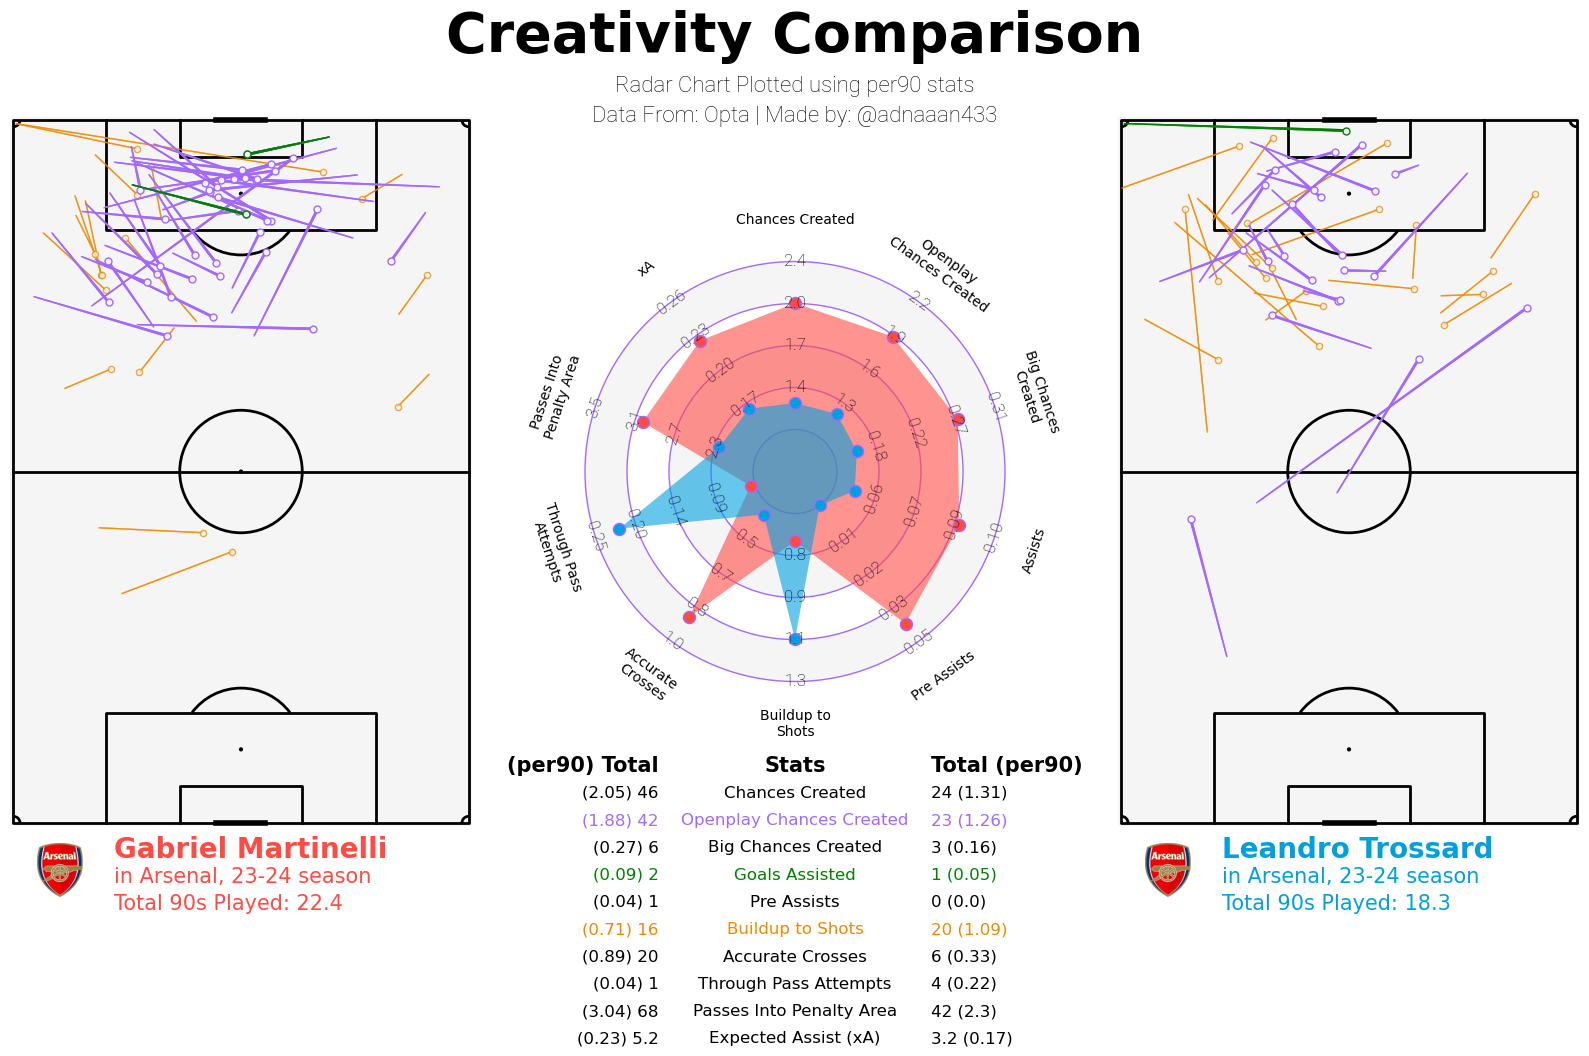

In [10]:
# Create a figure
fig = plt.figure(figsize=(16, 10))

# Add the first subplot with a 2:3 aspect ratio
ax1 = fig.add_subplot(131, aspect=2/3)
stats1 = creativity(ax1, player_1, hcol, player_1_xA, player_1_nts)

# Add the second subplot with a 2:2 aspect ratio
ax2 = fig.add_subplot(132, aspect=1)  # 2:2 aspect ratio is equivalent to 1 
# ax2.set_position([0.37, 1, 0.2, 0.2]) 
plot_radar(ax2)


# Add the third subplot with a 2:3 aspect ratio
ax3 = fig.add_subplot(133, aspect=2/3)
stats2 = creativity(ax3, player_2, acol, player_2_xA, player_2_nts)

# Adjust layout to prevent overlap
plt.tight_layout()

fig.text(0.5, 0.97, 'Creativity Comparison', fontsize=40, fontweight='bold', ha='center', va='center')
fig.text(0.5, 0.92, 'Radar Chart Plotted using per90 stats', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')
fig.text(0.5, 0.89, 'Data From: Opta | Made by: @adnaaan433', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')

In [98]:
# # Create the figure and the axes
# fig = plt.figure(constrained_layout=False, figsize=(22, 12))

# # Create a grid of 3 columns and 3 rows with specified width and height ratios
# grid = fig.add_gridspec(3, 3, width_ratios=[2, 1, 2], height_ratios=[3, 1.5, 3])

# # Create the first subplot (2:3) in the first column
# ax1 = fig.add_subplot(grid[0:, 0])
# stats1 = creativity(ax1, 'Ilkay Gundogan', hcol, 9.8, 33.3)

# # Create the first 1:1 subplot in the second column
# ax2 = fig.add_subplot(grid[0, 1])
# plot_radar(ax2)

# # Create the second 1:1 subplot in the second column
# ax3 = fig.add_subplot(grid[1, 1])
# ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.spines['left'].set_visible(False)
# ax3.set_xticks([])
# ax3.set_yticks([]) 
# ax3.set_facecolor('None')

# # Create the second subplot (2:3) in the third column
# ax4 = fig.add_subplot(grid[0:, 2])
# stats2 = creativity(ax4, 'Toni Kroos', acol, 5.9, 23.6)

# # Display the plot
# plt.show()

# Ball Progression

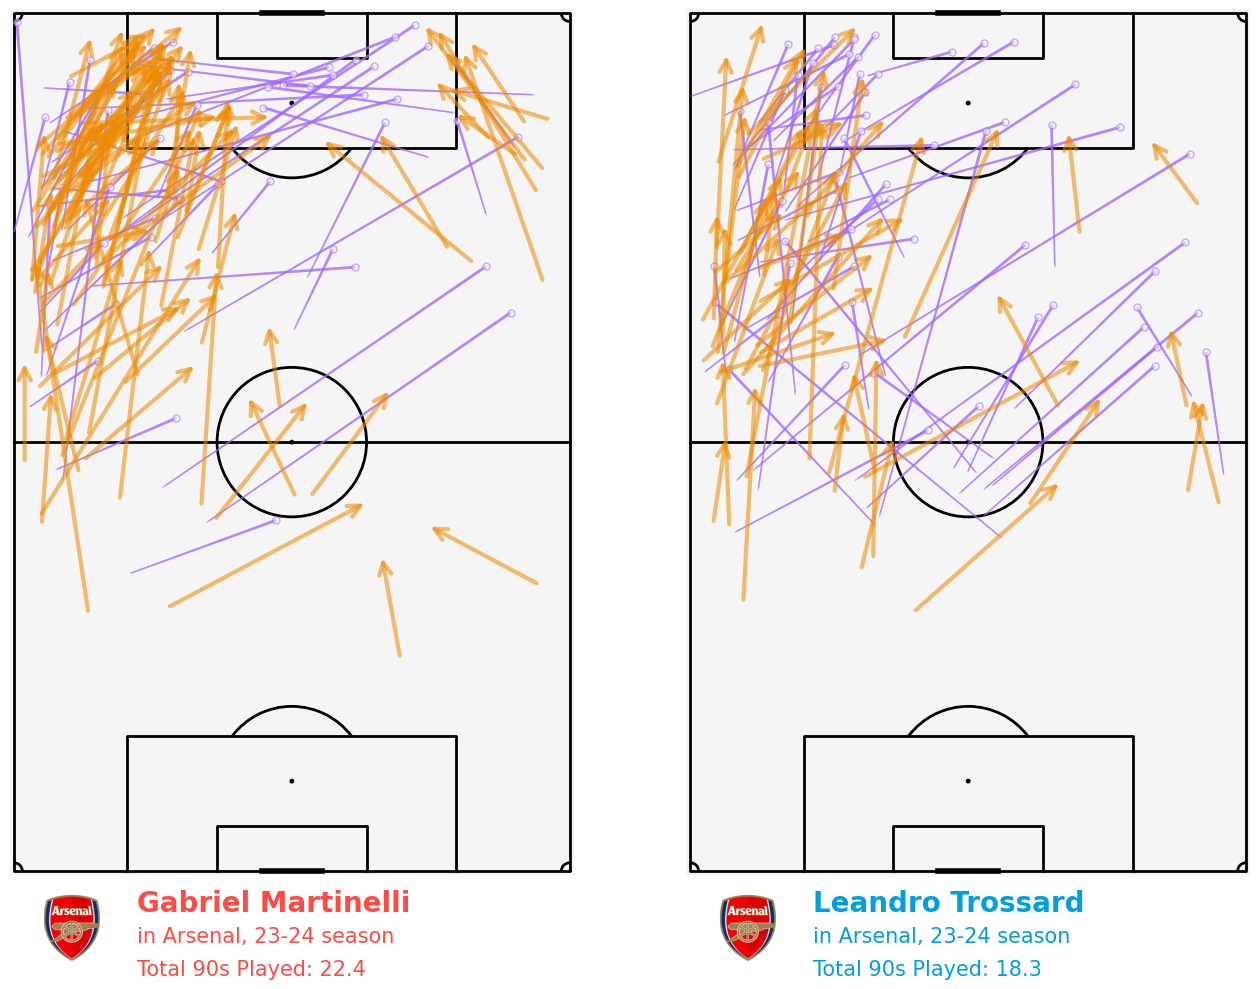

In [11]:
def progression(ax, pname, xol, nts):
    df_player = df[(df['name']==pname)]
    dfpass = df_player[(df_player['type']=='Pass') & (df_player['name']==pname)]
    acc_pass = dfpass[dfpass['outcomeType']=='Successful']
    pro_pass = acc_pass[(acc_pass['prog_pass']>=9.11) & (acc_pass['x']>=35) &
                        (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    pro_carry = df_player[(df_player['prog_carry']>=9.11) & (df_player['endX']>=35)]
    
    fnl_thd_pass = acc_pass[(acc_pass['x']<70) & (acc_pass['endX']>=70) & (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    fnl_thd_carry = df_player[(df_player['type']=='Carry') & (df_player['x']<70) & (df_player['endX']>=70)]
    
    frwd_pass = dfpass[(dfpass['pass_or_carry_angle']>= -85) & (dfpass['pass_or_carry_angle']<= 85) & 
                       (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    frwd_pass_acc = frwd_pass[frwd_pass['outcomeType']=='Successful']
    frwd_pass_perc = round(len(frwd_pass_acc)/len(acc_pass)*100, 2)
    
    lngball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (dfpass['endX']-dfpass['x']>0) &
                     (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick|KickOff'))]
    lngball_acc = lngball[lngball['outcomeType']=='Successful']
    
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 68.5)
    ax.set_ylim(-0.5, 105.5)
    ax.invert_xaxis()

    pitch.lines(pro_pass.x, pro_pass.y, pro_pass.endX, pro_pass.endY, color=violet, lw=2, alpha=0.55, comet=True, zorder=4, ax=ax)
    pitch.scatter(pro_pass.endX, pro_pass.endY, s=25, color=bg_color,  edgecolor=violet, alpha=0.55, zorder=4, ax=ax)

    for index, row in pro_carry.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', linestyle='-',
                                        color='#ed8a00', zorder=5, mutation_scale=22, alpha=0.55, linewidth=3)
        ax.add_patch(arrow)

    team_name = dfpass['teamName'].max()
    position = dfpass['position'].max()
    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(-7, 61, image, height=8, ax=ax)
    ax.text(53, -4, f'{pname}', color=xol, fontsize=20, fontweight='bold', ha='left', va='center')
    ax.text(53, -8, f'in {team_name}, 23-24 season', color=xol, fontsize=15, ha='left', va='center')
    ax.text(53, -12, f'Total 90s Played: {nts}', color=xol, fontsize=15, ha='left', va='center')
    
    return {
        'Name': pname,
        'Progressive Pass_t': len(pro_pass),
        'Progressive Carry_t': len(pro_carry),
        'Longballs Attempts_t': len(lngball),
        'Accurate Longballs_t': len(lngball_acc),
        'Passes Into Final Third_t': len(fnl_thd_pass),
        'Carries Into Final Third_t': len(fnl_thd_carry),
        'Forward Passing Rate%': frwd_pass_perc,
        '90s': nts
    }

fig,axs=plt.subplots(1,2, figsize=(16,12))
stats1 = progression(axs[0], player_1, hcol, player_1_nts)
stats2 = progression(axs[1], player_2, acol, player_2_nts)

In [12]:
list1 = []
list1.append(stats1)
stats1_df = pd.DataFrame(list1)

list2 = []
list2.append(stats2)
stats2_df = pd.DataFrame(list2)

comp_df = pd.concat([stats1_df, stats2_df])

total_df = comp_df.copy()
total_df = total_df.T.reset_index(drop=False)
total_df.columns = total_df.iloc[0]
total_df = total_df[1:].reset_index(drop=True)

comp_df['Progressive Pass'] = (comp_df['Progressive Pass_t']/comp_df['90s']).round(2)
comp_df['Progressive Carry'] = (comp_df['Progressive Carry_t']/comp_df['90s']).round(2)
comp_df['Longballs Attempts'] = (comp_df['Longballs Attempts_t']/comp_df['90s']).round(2)
comp_df['Accurate Longballs'] = (comp_df['Accurate Longballs_t']/comp_df['90s']).round(2)
comp_df['Passes Into Final Third'] = (comp_df['Passes Into Final Third_t']/comp_df['90s']).round(2)
comp_df['Carries Into Final Third'] = (comp_df['Carries Into Final Third_t']/comp_df['90s']).round(2)

comp_df = comp_df[['Name', 'Progressive Pass', 'Progressive Carry', 'Longballs Attempts', 'Accurate Longballs', 'Passes Into Final Third', 
                   'Carries Into Final Third', 'Forward Passing Rate%']]

comp_df = comp_df.T.reset_index(drop=False)
comp_df.columns = comp_df.iloc[0]
comp_df = comp_df[1:].reset_index(drop=True)

params = comp_df['Name'].to_list()
stats_list1 = comp_df[player_1].to_list()
stats_list2 = comp_df[player_2].to_list()

# Initialize the low and high lists
low = []
high = []

# Iterate through both lists and populate low and high lists

for a, b in zip(stats_list1, stats_list2):
    if a < b:
        low.append(a-(a*.1))
        high.append(b+(b*.1))
    else:
        low.append(b-(b*.1))
        high.append(a+(a*.1))

def progressive_radar(ax):
    radar = Radar(params, low, high, num_rings=4, ring_width=1, center_circle_radius=1)

    rings_inner = radar.draw_circles(ax=ax, facecolor='#f5f5f5', edgecolor=violet)
    radar_output = radar.draw_radar_compare(stats_list1, stats_list2, ax=ax,
                                        kwargs_radar={'facecolor': hcol, 'alpha': 0.6},
                                        kwargs_compare={'facecolor': acol, 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    ax.scatter(vertices1[:, 0], vertices1[:, 1], c=hcol, edgecolors=violet, marker='o', s=75, zorder=2)
    ax.scatter(vertices2[:, 0], vertices2[:, 1], c=acol, edgecolors=violet, marker='o', s=75, zorder=2)

    range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([]) 

    ax.text(0, -7-(0*0.75), 'Stats', color='k', fontsize=15, fontweight='bold', ha='center', va='center')
    ax.text(0, -7-(1*0.75), 'Progressive Pass', color=violet, fontsize=12, ha='center', va='center')
    ax.text(0, -7-(2*0.75), 'Progressive Carry', color='#ed8a00', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(3*0.75), 'Longballs Attempts', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(4*0.75), 'Accurate Longballs', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(5*0.75), 'Passes Into Final Third', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(6*0.75), 'Carries Into Final Third', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(7*0.75), 'Forward Passing Rate%', color='k', fontsize=12, ha='center', va='center')

    ax.text(3.25, -7-(0*0.75), 'Total (per90)', color='k', fontsize=15, fontweight='bold', ha='left', va='center')
    ax.text(3.25, -7-(1*0.75), f'{total_df[player_2][0]} ({comp_df[player_2][0]})', color=violet, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(2*0.75), f'{total_df[player_2][1]} ({comp_df[player_2][1]})', color='#ed8a00', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(3*0.75), f'{total_df[player_2][2]} ({comp_df[player_2][2]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(4*0.75), f'{total_df[player_2][3]} ({comp_df[player_2][3]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(5*0.75), f'{total_df[player_2][4]} ({comp_df[player_2][4]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(6*0.75), f'{total_df[player_2][5]} ({comp_df[player_2][5]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(7*0.75), f'{total_df[player_2][6]} ({comp_df[player_2][6]})', color='k', fontsize=12, ha='left', va='center')

    ax.text(-3.25, -7-(0*0.75), '(per90) Total', color='k', fontsize=15, fontweight='bold', ha='right', va='center')
    ax.text(-3.25, -7-(1*0.75), f'({comp_df[player_1][0]}) {total_df[player_1][0]}', color=violet, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(2*0.75), f'({comp_df[player_1][1]}) {total_df[player_1][1]}', color='#ed8a00', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(3*0.75), f'({comp_df[player_1][2]}) {total_df[player_1][2]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(4*0.75), f'({comp_df[player_1][3]}) {total_df[player_1][3]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(5*0.75), f'({comp_df[player_1][4]}) {total_df[player_1][4]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(6*0.75), f'({comp_df[player_1][5]}) {total_df[player_1][5]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(7*0.75), f'({comp_df[player_1][6]}) {total_df[player_1][6]}', color='k', fontsize=12, ha='right', va='center')

    return 

# fig,ax=plt.subplots(figsize=(8,8))
# progressive_radar(ax)

Text(0.5, 0.87, 'Data From: Opta | Made by: @adnaaan433')

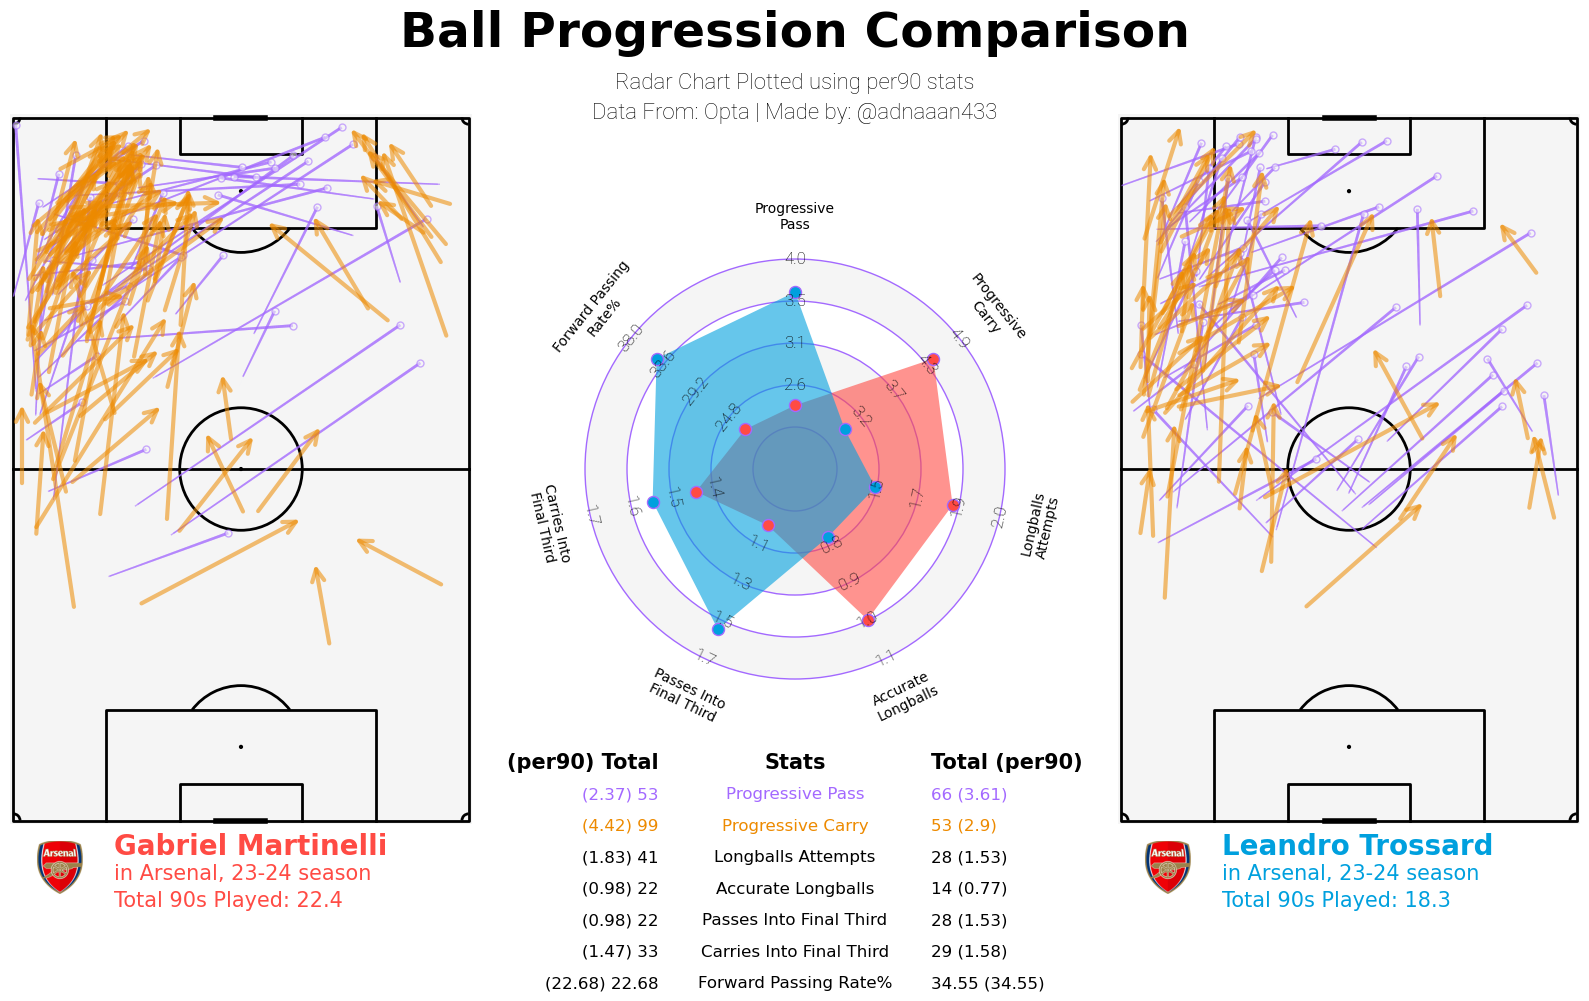

In [13]:
# Create a figure
fig = plt.figure(figsize=(16, 10))

# Add the first subplot with a 2:3 aspect ratio
ax1 = fig.add_subplot(131, aspect=2/3)
stats1 = progression(ax1, player_1, hcol, player_1_nts)

# Add the second subplot with a 2:2 aspect ratio
ax2 = fig.add_subplot(132, aspect=1)  # 2:2 aspect ratio is equivalent to 1 
# ax2.set_position([0.37, 1, 0.2, 0.2]) 
progressive_radar(ax2)


# Add the third subplot with a 2:3 aspect ratio
ax3 = fig.add_subplot(133, aspect=2/3)
stats2 = progression(ax3, player_2, acol, player_2_nts)

# Adjust layout to prevent overlap
plt.tight_layout()

fig.text(0.5, 0.95, 'Ball Progression Comparison', fontsize=35, fontweight='bold', ha='center', va='center')
fig.text(0.5, 0.90, 'Radar Chart Plotted using per90 stats', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')
fig.text(0.5, 0.87, 'Data From: Opta | Made by: @adnaaan433', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')

# Ball Winning 

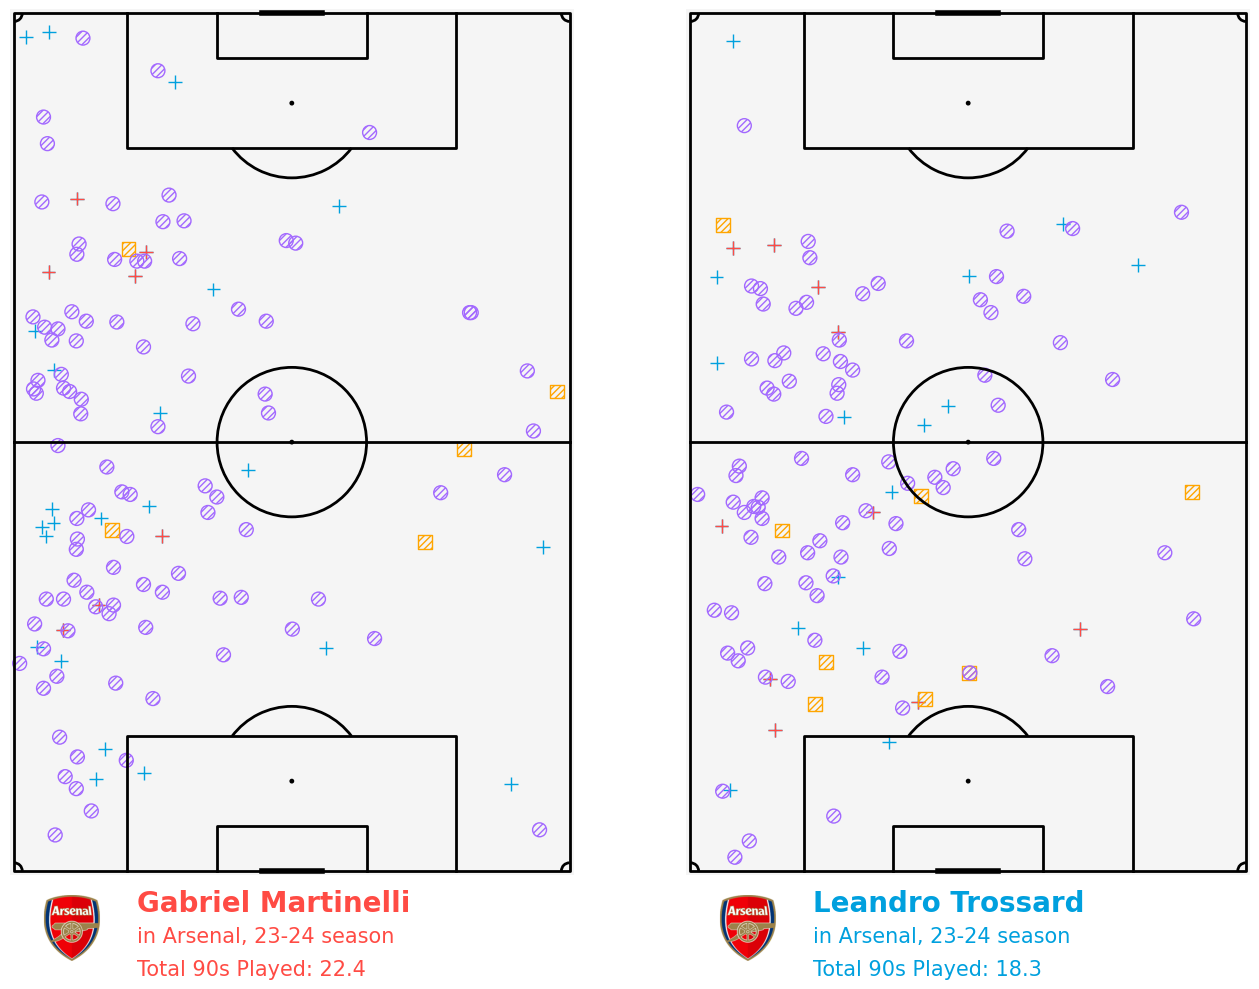

In [14]:
def BallWinning(ax, pname, xol, nts):
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, line_zorder=2, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 68.5)
    ax.set_ylim(-0.5, 105.5)
    ax.invert_xaxis()

    playerdf = df[(df['name']==pname)]
    ball_wins = playerdf[(playerdf['type']=='Interception') | (playerdf['type']=='BallRecovery')]
    f_third = ball_wins[ball_wins['x']>=70]

    fthd_def_acts  = playerdf[(playerdf['type'].str.contains('Tackle|Interception|BallRecovery|BlockedPass|Challenge|Foul')) & (playerdf['x']>=70)]

    hp_tk = playerdf[(playerdf['type']=='Tackle')]
    hp_tk_u = playerdf[(playerdf['type']=='Tackle') & (playerdf['outcomeType']=='Unsuccessful')]
    hp_intc = playerdf[(playerdf['type']=='Interception')]
    hp_br = playerdf[playerdf['type']=='BallRecovery']
    hp_cl = playerdf[playerdf['type']=='Clearance']
    hp_fl = playerdf[playerdf['type']=='Foul']
    pass_bl = playerdf[playerdf['type']=='BlockedPass']
    prbr = df[(df['name']==pname) & ((df['type']=='BallRecovery') | (df['type']=='Interception')) & (df['name'].shift(-1)==pname) & 
              (df['outcomeType'].shift(-1)=='Successful') &
              ((df['type'].shift(-1)!='Foul') | (df['type'].shift(-1)!='Dispossessed'))]
    if (len(hp_br)+len(hp_intc)) != 0:
        post_rec_ball_retention = round((len(prbr)/(len(hp_br)+len(hp_intc)))*100, 2)
    else:
        post_rec_ball_retention = 0

    pitch.scatter(hp_tk.x, hp_tk.y, s=100, c=acol, lw=1, edgecolor=acol, marker='+', hatch='/////', ax=ax)
    pitch.scatter(hp_tk_u.x, hp_tk_u.y, s=100, c=hcol, lw=1, edgecolor=hcol, marker='+', hatch='/////', ax=ax)
    pitch.scatter(hp_intc.x, hp_intc.y, s=100, c='None', lw=1, edgecolor='orange', marker='s', hatch='/////', ax=ax)
    pitch.scatter(hp_br.x, hp_br.y, s=100, c='None', lw=1, edgecolor=violet, marker='o', hatch='/////', ax=ax)

    team_name = playerdf['teamName'].max()
    position = playerdf['position'].max()
    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(-7, 61, image, height=8, ax=ax)
    ax.text(53, -4, f'{pname}', color=xol, fontsize=20, fontweight='bold', ha='left', va='center')
    ax.text(53, -8, f'in {team_name}, 23-24 season', color=xol, fontsize=15, ha='left', va='center')
    ax.text(53, -12, f'Total 90s Played: {nts}', color=xol, fontsize=15, ha='left', va='center')
    
    return {
        'Name': pname,
        'Tackles Attempts_t': len(hp_tk),
        'Tackles Wins_t': len(hp_tk_u),
        'Interceptions_t': len(hp_intc),
        'Ball Recoveries_t': len(hp_br),
        'Post Rec. Ball Retention': post_rec_ball_retention,
        'Final 1/3 Pressing_t': len(fthd_def_acts),
        'Final 1/3 Ball Win_t': len(f_third),
        'Pass Blocked_t': len(pass_bl),
        'Clearances_t': len(hp_cl),
        'Fouls_t': len(hp_fl),
        '90s': nts
    }

fig,axs=plt.subplots(1,2, figsize=(16,12))
stats1 = BallWinning(axs[0], player_1, hcol, player_1_nts)
stats2 = BallWinning(axs[1], player_2, acol, player_2_nts)

In [15]:
list1 = []
list1.append(stats1)
stats1_df = pd.DataFrame(list1)

list2 = []
list2.append(stats2)
stats2_df = pd.DataFrame(list2)

comp_df = pd.concat([stats1_df, stats2_df])

total_df = comp_df.copy()
total_df = total_df.T.reset_index(drop=False)
total_df.columns = total_df.iloc[0]
total_df = total_df[1:].reset_index(drop=True)

comp_df['Tackles Attempts'] = (comp_df['Tackles Attempts_t']/comp_df['90s']).round(2)
comp_df['Tackles Wins'] = (comp_df['Tackles Wins_t']/comp_df['90s']).round(2)
comp_df['Interceptions'] = (comp_df['Interceptions_t']/comp_df['90s']).round(2)
comp_df['Ball Recoveries'] = (comp_df['Ball Recoveries_t']/comp_df['90s']).round(2)
comp_df['Final 1/3 Pressing'] = (comp_df['Final 1/3 Pressing_t']/comp_df['90s']).round(2)
comp_df['Final 1/3 Ball Win'] = (comp_df['Final 1/3 Ball Win_t']/comp_df['90s']).round(2)
comp_df['Pass Blocked'] = (comp_df['Pass Blocked_t']/comp_df['90s']).round(2)
comp_df['Clearances'] = (comp_df['Clearances_t']/comp_df['90s']).round(2)
comp_df['Fouls'] = (comp_df['Fouls_t']/comp_df['90s']).round(2)

comp_df = comp_df[['Name', 'Tackles Attempts', 'Tackles Wins', 'Interceptions', 'Ball Recoveries', 'Post Rec. Ball Retention', 'Final 1/3 Pressing',
                   'Final 1/3 Ball Win', 'Pass Blocked', 'Clearances', 'Fouls']]

comp_df = comp_df.T.reset_index(drop=False)
comp_df.columns = comp_df.iloc[0]
comp_df = comp_df[1:].reset_index(drop=True)

params = comp_df['Name'].to_list()
stats_list1 = comp_df[player_1].to_list()
stats_list2 = comp_df[player_2].to_list()

# Initialize the low and high lists
low = []
high = []

# Iterate through both lists and populate low and high lists

for a, b in zip(stats_list1, stats_list2):
    if a < b:
        low.append(a-(a*.15))
        high.append(b+(b*.1))
    else:
        low.append(b-(b*.15))
        high.append(a+(a*.1))

def ball_win_radar(ax):
    radar = Radar(params, low, high, lower_is_better=['Fouls'], num_rings=4, ring_width=1, center_circle_radius=1)

    rings_inner = radar.draw_circles(ax=ax, facecolor='#f5f5f5', edgecolor=violet)
    radar_output = radar.draw_radar_compare(stats_list1, stats_list2, ax=ax,
                                        kwargs_radar={'facecolor': hcol, 'alpha': 0.6},
                                        kwargs_compare={'facecolor': acol, 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    ax.scatter(vertices1[:, 0], vertices1[:, 1], c=hcol, edgecolors=violet, marker='o', s=75, zorder=2)
    ax.scatter(vertices2[:, 0], vertices2[:, 1], c=acol, edgecolors=violet, marker='o', s=75, zorder=2)

    range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([]) 

    ax.text(0, -7-(0*0.65), 'Stats', color='k', fontsize=15, fontweight='bold', ha='center', va='center')
    ax.text(0, -7-(1*0.65), 'Tackles Attempts', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(2*0.65), 'Tackles Wins', color=acol, fontsize=12, ha='center', va='center')
    ax.text(0, -7-(3*0.65), 'Interceptions', color='#ed8a00', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(4*0.65), 'Ball Recoveries', color=violet, fontsize=12, ha='center', va='center')
    ax.text(0, -7-(5*0.65), 'Post Rec. Ball Retention%', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(6*0.65), 'Final 1/3 Pressing', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(7*0.65), 'Final 1/3 Ball Win', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(8*0.65), 'Pass Blocked', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(9*0.65), 'Clearances', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(10*0.65), 'Fouls', color='k', fontsize=12, ha='center', va='center')

    ax.text(3.25, -7-(0*0.65), 'Total (per90)', color='k', fontsize=15, fontweight='bold', ha='left', va='center')
    ax.text(3.25, -7-(1*0.65), f'{total_df[player_2][0]} ({comp_df[player_2][0]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(2*0.65), f'{total_df[player_2][1]} ({comp_df[player_2][1]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(3*0.65), f'{total_df[player_2][2]} ({comp_df[player_2][2]})', color='#ed8a00', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(4*0.65), f'{total_df[player_2][3]} ({comp_df[player_2][3]})', color=violet, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(5*0.65), f'{total_df[player_2][4]} ({comp_df[player_2][4]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(6*0.65), f'{total_df[player_2][5]} ({comp_df[player_2][5]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(7*0.65), f'{total_df[player_2][6]} ({comp_df[player_2][6]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(8*0.65), f'{total_df[player_2][7]} ({comp_df[player_2][7]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(9*0.65), f'{total_df[player_2][8]} ({comp_df[player_2][8]})', color='k', fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(10*0.65), f'{total_df[player_2][9]} ({comp_df[player_2][9]})', color='k', fontsize=12, ha='left', va='center')

    ax.text(-3.25, -7-(0*0.65), '(per90) Total', color='k', fontsize=15, fontweight='bold', ha='right', va='center')
    ax.text(-3.25, -7-(1*0.65), f'({comp_df[player_1][0]}) {total_df[player_1][0]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(2*0.65), f'({comp_df[player_1][1]}) {total_df[player_1][1]}', color=acol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(3*0.65), f'({comp_df[player_1][2]}) {total_df[player_1][2]}', color='#ed8a00', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(4*0.65), f'({comp_df[player_1][3]}) {total_df[player_1][3]}', color=violet, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(5*0.65), f'({comp_df[player_1][4]}) {total_df[player_1][4]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(6*0.65), f'({comp_df[player_1][5]}) {total_df[player_1][5]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(7*0.65), f'({comp_df[player_1][6]}) {total_df[player_1][6]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(8*0.65), f'({comp_df[player_1][7]}) {total_df[player_1][7]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(9*0.65), f'({comp_df[player_1][8]}) {total_df[player_1][8]}', color='k', fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(10*0.65), f'({comp_df[player_1][9]}) {total_df[player_1][9]}', color='k', fontsize=12, ha='right', va='center')

    return 

# fig,ax=plt.subplots(figsize=(8,8))
# # ball_win_radar(ax)

Text(0.5, 0.87, 'Data From: Opta | Made by: @adnaaan433')

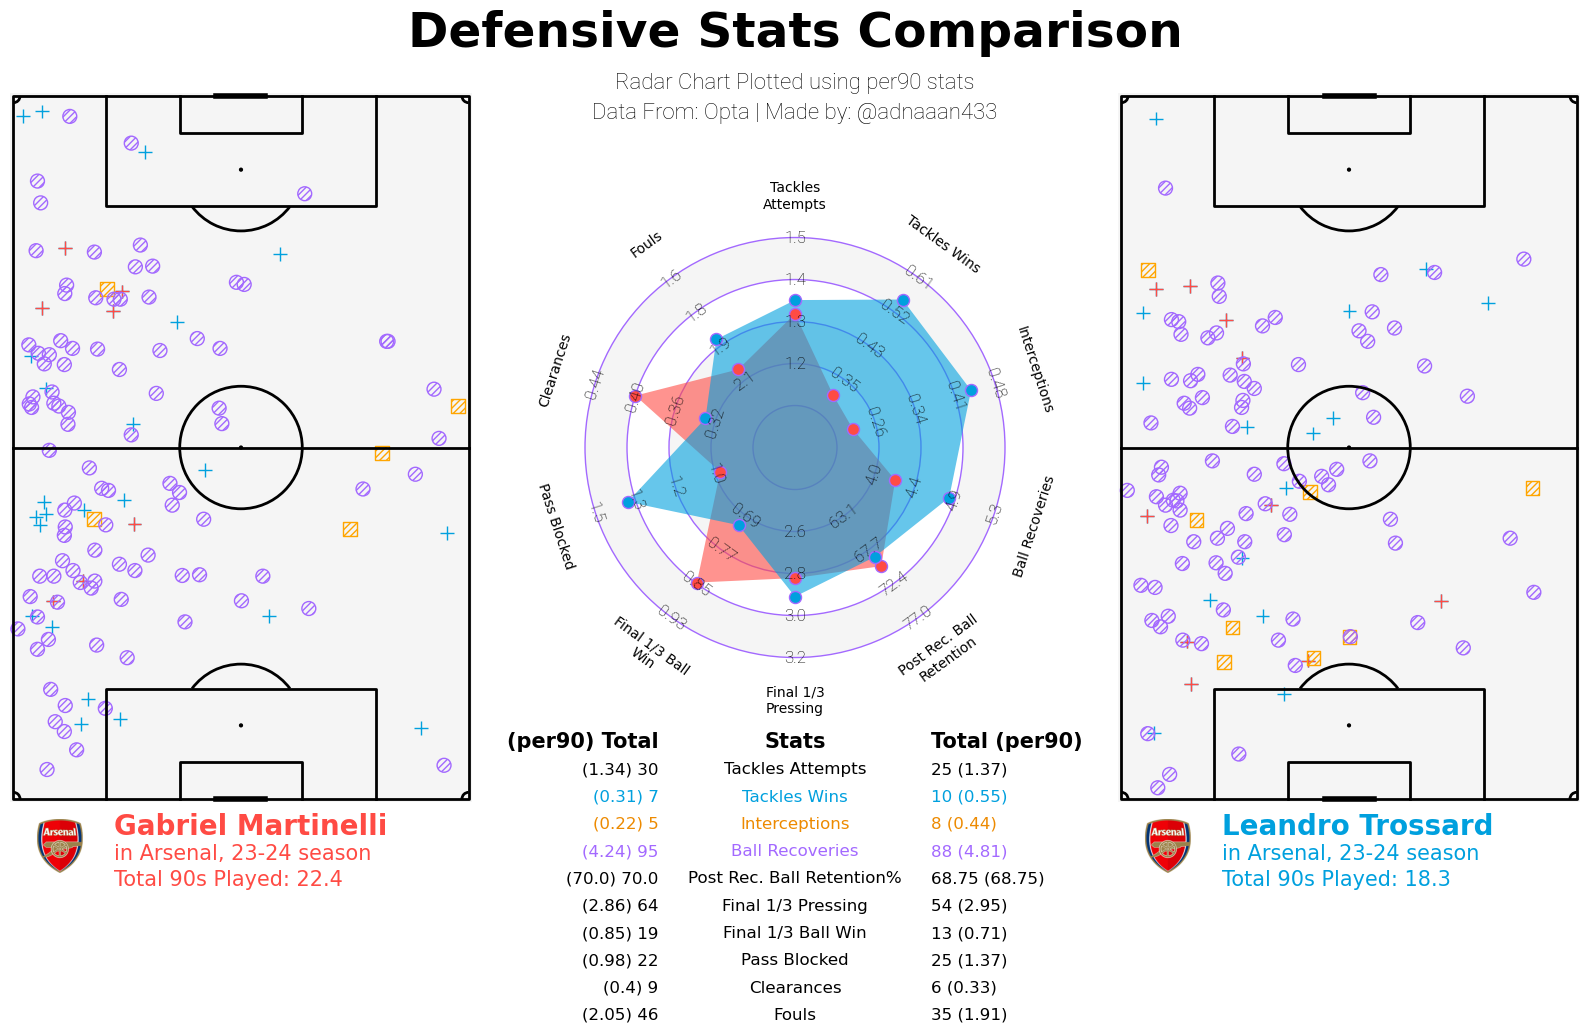

In [16]:
# Create a figure
fig = plt.figure(figsize=(16, 10))

# Add the first subplot with a 2:3 aspect ratio
ax1 = fig.add_subplot(131, aspect=2/3)
stats1 = BallWinning(ax1, player_1, hcol, player_1_nts)

# Add the second subplot with a 2:2 aspect ratio
ax2 = fig.add_subplot(132, aspect=1)  # 2:2 aspect ratio is equivalent to 1 
# ax2.set_position([0.37, 1, 0.2, 0.2]) 
ball_win_radar(ax2)


# Add the third subplot with a 2:3 aspect ratio
ax3 = fig.add_subplot(133, aspect=2/3)
stats2 = BallWinning(ax3, player_2, acol, player_2_nts)

# Adjust layout to prevent overlap
plt.tight_layout()

fig.text(0.5, 0.95, 'Defensive Stats Comparison', fontsize=35, fontweight='bold', ha='center', va='center')
fig.text(0.5, 0.90, 'Radar Chart Plotted using per90 stats', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')
fig.text(0.5, 0.87, 'Data From: Opta | Made by: @adnaaan433', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')

# Shooting

In [17]:
df_shots['playerName'] = df_shots['playerName'].apply(unidecode)
df_shots['shortName'] = df_shots['shortName'].apply(unidecode)

C:\Users\h\AppData\Local\Temp\ipykernel_12520\3608154858.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerdf['distance'] = np.sqrt((playerdf['x'] - 105)**2 + (playerdf['y'] - 34)**2)
C:\Users\h\AppData\Local\Temp\ipykernel_12520\3608154858.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerdf['distance'] = np.sqrt((playerdf['x'] - 105)**2 + (playerdf['y'] - 34)**2)


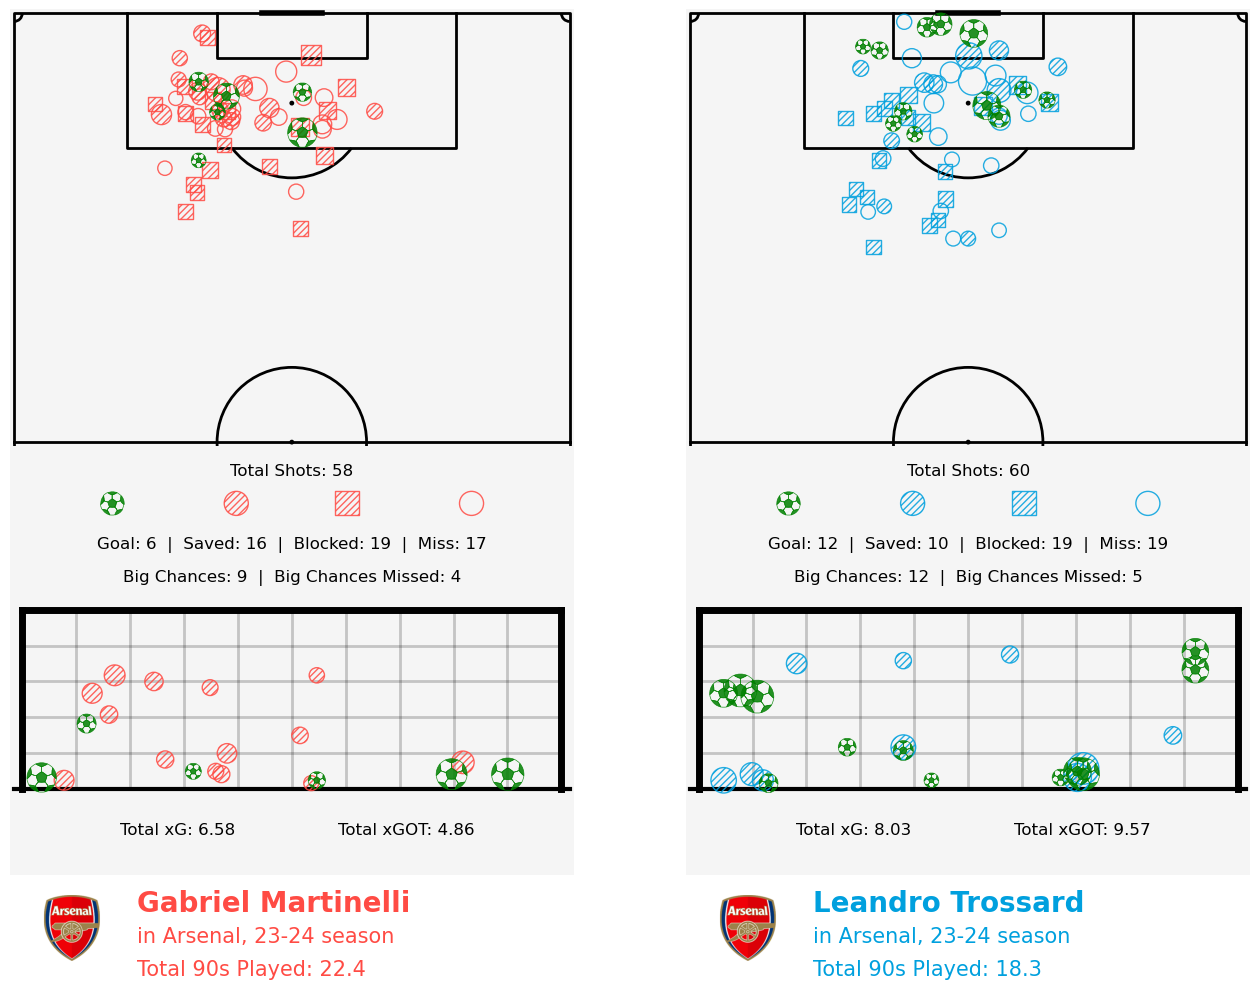

In [18]:
def Shooting(ax, pname, xol, nts):
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, line_zorder=2, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_xlim(-0.5, 68.5)
    ax.set_ylim(-0.5, 105.5)
    ax.invert_xaxis()

    xhalf = [-0.5, -0.5, 68.5, 68.5]
    yhalf = [-0.5, 52, 52, -0.5]
    ax.fill(xhalf, yhalf, bg_color, alpha=1, zorder=3)

    ax.plot([1, 1], [10, 32], color=line_color, linewidth=5, zorder=4)
    ax.plot([1, 67], [32, 32], color=line_color, linewidth=5, zorder=4)
    ax.plot([67, 67], [32, 10], color=line_color, linewidth=5, zorder=4)
    ax.plot([0, 68], [10, 10], color=line_color, linewidth=3, zorder=4)

    x_values = np.arange(0, 6) * 4.4 + 10
    for x in x_values:
        ax.plot([1, 67], [x, x], color=line_color, linewidth=2, alpha=0.2, zorder=4)
    y_values = (np.arange(0, 11) * 6.6) + 1
    for y in y_values:
        ax.plot([y, y], [10, 32], color=line_color, linewidth=2, alpha=0.2, zorder=4)

    dfplayer = df[df['name']==pname]
    bc = dfplayer[(dfplayer['type'].str.contains('Shot|Goal')) & (dfplayer['qualifiers'].str.contains('BigChance'))]
    bc_g = dfplayer[(dfplayer['type'].str.contains('Shot')) & (dfplayer['qualifiers'].str.contains('BigChance'))]
    playerdf = df_shots[(df_shots['playerName']==pname)]
    pnp = playerdf[~(playerdf['situation'].str.contains('Penalty'))]

    goals = playerdf[playerdf['eventType']=='Goal']
    saved = playerdf[(playerdf['eventType']=='AttemptSaved') & (playerdf['isBlocked']==0)]
    blokd = playerdf[(playerdf['eventType']=='AttemptSaved') & (playerdf['isBlocked']==1)]
    misss = playerdf[playerdf['eventType']=='Miss']
    posts = playerdf[playerdf['eventType']=='Post']

    pitch.scatter(goals.x, goals.y, c='None', edgecolors='green', s=(goals['expectedGoals']*500)+100, marker='football', alpha=0.85, zorder=6, ax=ax)
    pitch.scatter(saved.x, saved.y, c='None', edgecolors=xol, s=(saved['expectedGoals']*500)+100, marker='o', hatch='/////', alpha=0.85, zorder=5, ax=ax)
    pitch.scatter(blokd.x, blokd.y, c='None', edgecolors=xol, s=(blokd['expectedGoals']*500)+100, marker='s', hatch='/////', alpha=0.85, zorder=4, ax=ax)
    pitch.scatter(misss.x, misss.y, c='None', edgecolors=xol, s=(misss['expectedGoals']*500)+100, marker='o', alpha=0.85, zorder=3, ax=ax)
    pitch.scatter(posts.x, posts.y, c='None', edgecolors=xol, s=(posts['expectedGoals']*500)+100, marker='o', alpha=0.85, zorder=2, ax=ax)

    pitch.scatter(45, 56, c='None', edgecolors='green', s=300, marker='football', alpha=0.85, zorder=6, ax=ax)
    pitch.scatter(45, 40.8, c='None', edgecolors=xol, s=300, marker='o', hatch='/////', alpha=0.85, zorder=5, ax=ax)
    pitch.scatter(45, 27.2, c='None', edgecolors=xol, s=300, marker='s', hatch='/////', alpha=0.85, zorder=4, ax=ax)
    pitch.scatter(45, 12, c='None', edgecolors=xol, s=300, marker='o', alpha=0.85, zorder=3, ax=ax)

    xG = playerdf['expectedGoals'].sum().round(2)
    xGOT = playerdf['expectedGoalsOnTarget'].sum().round(2)
    ax.text(34, 49, f'Total Shots: {len(playerdf)}', fontsize=12, ha='center', va='center')
    ax.text(34, 40, f'Goal: {len(goals)}  |  Saved: {len(saved)}  |  Blocked: {len(blokd)}  |  Miss: {len(misss)+len(posts)}', 
            fontsize=12, ha='center', va='center')
    ax.text(48, 5, f'Total xG: {xG}', fontsize=12, ha='center', va='center')
    ax.text(20, 5, f'Total xGOT: {xGOT}', fontsize=12, ha='center', va='center')
    ax.text(34, 36, f'Big Chances: {len(bc)}  |  Big Chances Missed: {len(bc)-len(bc_g)}', fontsize=12, ha='center', va='center')

    pitch.scatter((goals.goalCrossedZ*(22/2.44)+10), ((goals.goalCrossedY-30.34)*(66/7.32)), c='None', edgecolors='green', 
                  s=(goals['expectedGoalsOnTarget']*500)+100, marker='football', alpha=0.85, zorder=6, ax=ax)
    pitch.scatter((saved.goalCrossedZ*(22/2.44)+10), ((saved.goalCrossedY-30.34)*(66/7.32)), c='None', edgecolors=xol, 
                  s=(saved['expectedGoalsOnTarget']*500)+100, marker='o', hatch='/////', alpha=0.85, zorder=5, ax=ax)


    np_goals = pnp[pnp['eventType']=='Goal']
    np_saved = pnp[(pnp['eventType']=='AttemptSaved') & (pnp['isBlocked']==0)]
    np_blokd = pnp[(pnp['eventType']=='AttemptSaved') & (pnp['isBlocked']==1)]
    np_misss = pnp[pnp['eventType']=='Miss']
    np_posts = pnp[pnp['eventType']=='Post']

    np_shots = len(pnp)
    np_goals = len(np_goals)
    np_xG = pnp['expectedGoals'].sum().round(2)
    np_xGOT = pnp['expectedGoalsOnTarget'].sum().round(2)
    sont = playerdf[playerdf['isOnTarget']==1]
    soft = playerdf[playerdf['isOnTarget']==0]
    sblk = playerdf[playerdf['isBlocked']==1]
    xgpsh = round(np_xG/np_shots, 2)
    playerdf['distance'] = np.sqrt((playerdf['x'] - 105)**2 + (playerdf['y'] - 34)**2)
    avg_dist = round(playerdf['distance'].median(), 2)
    out_box = dfplayer[dfplayer['qualifiers'].str.contains('OutOfBox')]
    in_box = len(playerdf) - len(out_box)

    team_name = dfplayer['teamName'].max()
    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(-7, 61, image, height=8, ax=ax)
    ax.text(53, -4, f'{pname}', color=xol, fontsize=20, fontweight='bold', ha='left', va='center')
    ax.text(53, -8, f'in {team_name}, 23-24 season', color=xol, fontsize=15, ha='left', va='center')
    ax.text(53, -12, f'Total 90s Played: {nts}', color=xol, fontsize=15, ha='left', va='center')
    
    return {
        'Name': pname,
        'NonPenalty Shots_t': np_shots,
        'NonPenalty Goals_t': np_goals,
        'NonPenalty xG_t': np_xG,
        'NonPenalty xGOT_t': np_xGOT,
        'Shots On Target_t': len(sont),
        'Shots Off Target_t': len(soft), 
        'Shots Blocked_t': len(sblk), 
        'xG/NonPenalty Shots': xgpsh,
        'Avg. Shot Distance': avg_dist,
        'Shots Inside the Box_t': in_box,
        'Shots Out of the Box_t': len(out_box),
        '90s': nts
    }

fig,axs=plt.subplots(1,2, figsize=(16,12))
stats1 = Shooting(axs[0], player_1, hcol, player_1_nts)
stats2 = Shooting(axs[1], player_2, acol, player_2_nts)

In [19]:
list1 = []
list1.append(stats1)
stats1_df = pd.DataFrame(list1)

list2 = []
list2.append(stats2)
stats2_df = pd.DataFrame(list2)

comp_df = pd.concat([stats1_df, stats2_df])

total_df = comp_df.copy()
total_df = total_df.T.reset_index(drop=False)
total_df.columns = total_df.iloc[0]
total_df = total_df[1:].reset_index(drop=True)

comp_df['NonPenalty Shots'] = (comp_df['NonPenalty Shots_t']/comp_df['90s']).round(2)
comp_df['NonPenalty Goals'] = (comp_df['NonPenalty Goals_t']/comp_df['90s']).round(2)
comp_df['NonPenalty xG'] = (comp_df['NonPenalty xG_t']/comp_df['90s']).round(2)
comp_df['NonPenalty xGOT'] = (comp_df['NonPenalty xGOT_t']/comp_df['90s']).round(2)
comp_df['Shots On Target'] = (comp_df['Shots On Target_t']/comp_df['90s']).round(2)
comp_df['Shots Off Target'] = (comp_df['Shots Off Target_t']/comp_df['90s']).round(2)
comp_df['Shots Blocked'] = (comp_df['Shots Blocked_t']/comp_df['90s']).round(2)
comp_df['Shots Inside the Box'] = (comp_df['Shots Inside the Box_t']/comp_df['90s']).round(2)
comp_df['Shots Out of the Box'] = (comp_df['Shots Out of the Box_t']/comp_df['90s']).round(2)

comp_df = comp_df[['Name', 'NonPenalty Shots', 'NonPenalty Goals', 'NonPenalty xG', 'NonPenalty xGOT', 'Shots On Target', 'Shots Off Target',
                   'Shots Blocked', 'xG/NonPenalty Shots', 'Avg. Shot Distance', 'Shots Inside the Box', 'Shots Out of the Box']]

comp_df = comp_df.T.reset_index(drop=False)
comp_df.columns = comp_df.iloc[0]
comp_df = comp_df[1:].reset_index(drop=True)

params = comp_df['Name'].to_list()
stats_list1 = comp_df[player_1].to_list()
stats_list2 = comp_df[player_2].to_list()

# Initialize the low and high lists
low = []
high = []

# Iterate through both lists and populate low and high lists

for a, b in zip(stats_list1, stats_list2):
    if a < b:
        low.append(a-(a*.15))
        high.append(b+(b*.1))
    else:
        low.append(b-(b*.15))
        high.append(a+(a*.1))

def shooting_radar(ax):
    radar = Radar(params, low, high, lower_is_better=['Shots Off Target', 'Shots Blocked'], num_rings=4, ring_width=1, center_circle_radius=1)

    rings_inner = radar.draw_circles(ax=ax, facecolor='#f5f5f5', edgecolor=violet)
    radar_output = radar.draw_radar_compare(stats_list1, stats_list2, ax=ax,
                                        kwargs_radar={'facecolor': hcol, 'alpha': 0.6},
                                        kwargs_compare={'facecolor': acol, 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    ax.scatter(vertices1[:, 0], vertices1[:, 1], c=hcol, edgecolors=violet, marker='o', s=75, zorder=2)
    ax.scatter(vertices2[:, 0], vertices2[:, 1], c=acol, edgecolors=violet, marker='o', s=75, zorder=2)

    range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=10)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([]) 

    ax.text(0, -7-(0*0.65), 'Stats', color='k', fontsize=15, fontweight='bold', ha='center', va='center')
    ax.text(0, -7-(1*0.65), 'NonPenalty Shots', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(2*0.65), 'NonPenalty Goals', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(3*0.65), 'NonPenalty xG', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(4*0.65), 'NonPenalty xGOT', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(5*0.65), 'Shots On Target', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(6*0.65), 'Shots Off Target', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(7*0.65), 'Shots Blocked', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(8*0.65), 'xG/NonPenalty Shots', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(9*0.65), 'Avg. Shot Distance', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(10*0.65), 'Shots Inside the Box', color='k', fontsize=12, ha='center', va='center')
    ax.text(0, -7-(11*0.65), 'Shots Out of the Box', color='k', fontsize=12, ha='center', va='center')

    ax.text(3.25, -7-(0*0.65), 'Total (per90)', color=acol, fontsize=15, fontweight='bold', ha='left', va='center')
    ax.text(3.25, -7-(1*0.65), f'{total_df[player_2][0]} ({comp_df[player_2][0]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(2*0.65), f'{total_df[player_2][1]} ({comp_df[player_2][1]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(3*0.65), f'{total_df[player_2][2]} ({comp_df[player_2][2]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(4*0.65), f'{total_df[player_2][3]} ({comp_df[player_2][3]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(5*0.65), f'{total_df[player_2][4]} ({comp_df[player_2][4]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(6*0.65), f'{total_df[player_2][5]} ({comp_df[player_2][5]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(7*0.65), f'{total_df[player_2][6]} ({comp_df[player_2][6]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(8*0.65), f'{total_df[player_2][7]} ({comp_df[player_2][7]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(9*0.65), f'{total_df[player_2][8]} ({comp_df[player_2][8]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(10*0.65), f'{total_df[player_2][9]} ({comp_df[player_2][9]})', color=acol, fontsize=12, ha='left', va='center')
    ax.text(3.25, -7-(11*0.65), f'{total_df[player_2][10]} ({comp_df[player_2][10]})', color=acol, fontsize=12, ha='left', va='center')

    ax.text(-3.25, -7-(0*0.65), '(per90) Total', color=hcol, fontsize=15, fontweight='bold', ha='right', va='center')
    ax.text(-3.25, -7-(1*0.65), f'({comp_df[player_1][0]}) {total_df[player_1][0]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(2*0.65), f'({comp_df[player_1][1]}) {total_df[player_1][1]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(3*0.65), f'({comp_df[player_1][2]}) {total_df[player_1][2]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(4*0.65), f'({comp_df[player_1][3]}) {total_df[player_1][3]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(5*0.65), f'({comp_df[player_1][4]}) {total_df[player_1][4]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(6*0.65), f'({comp_df[player_1][5]}) {total_df[player_1][5]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(7*0.65), f'({comp_df[player_1][6]}) {total_df[player_1][6]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(8*0.65), f'({comp_df[player_1][7]}) {total_df[player_1][7]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(9*0.65), f'({comp_df[player_1][8]}) {total_df[player_1][8]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(10*0.65), f'({comp_df[player_1][9]}) {total_df[player_1][9]}', color=hcol, fontsize=12, ha='right', va='center')
    ax.text(-3.25, -7-(11*0.65), f'({comp_df[player_1][10]}) {total_df[player_1][10]}', color=hcol, fontsize=12, ha='right', va='center')

    return 

# fig,ax=plt.subplots(figsize=(8,8))
# shooting_radar(ax)

C:\Users\h\AppData\Local\Temp\ipykernel_12520\3608154858.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerdf['distance'] = np.sqrt((playerdf['x'] - 105)**2 + (playerdf['y'] - 34)**2)
C:\Users\h\AppData\Local\Temp\ipykernel_12520\3608154858.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerdf['distance'] = np.sqrt((playerdf['x'] - 105)**2 + (playerdf['y'] - 34)**2)


Text(0.5, 0.87, 'Data From: Opta | Made by: @adnaaan433')

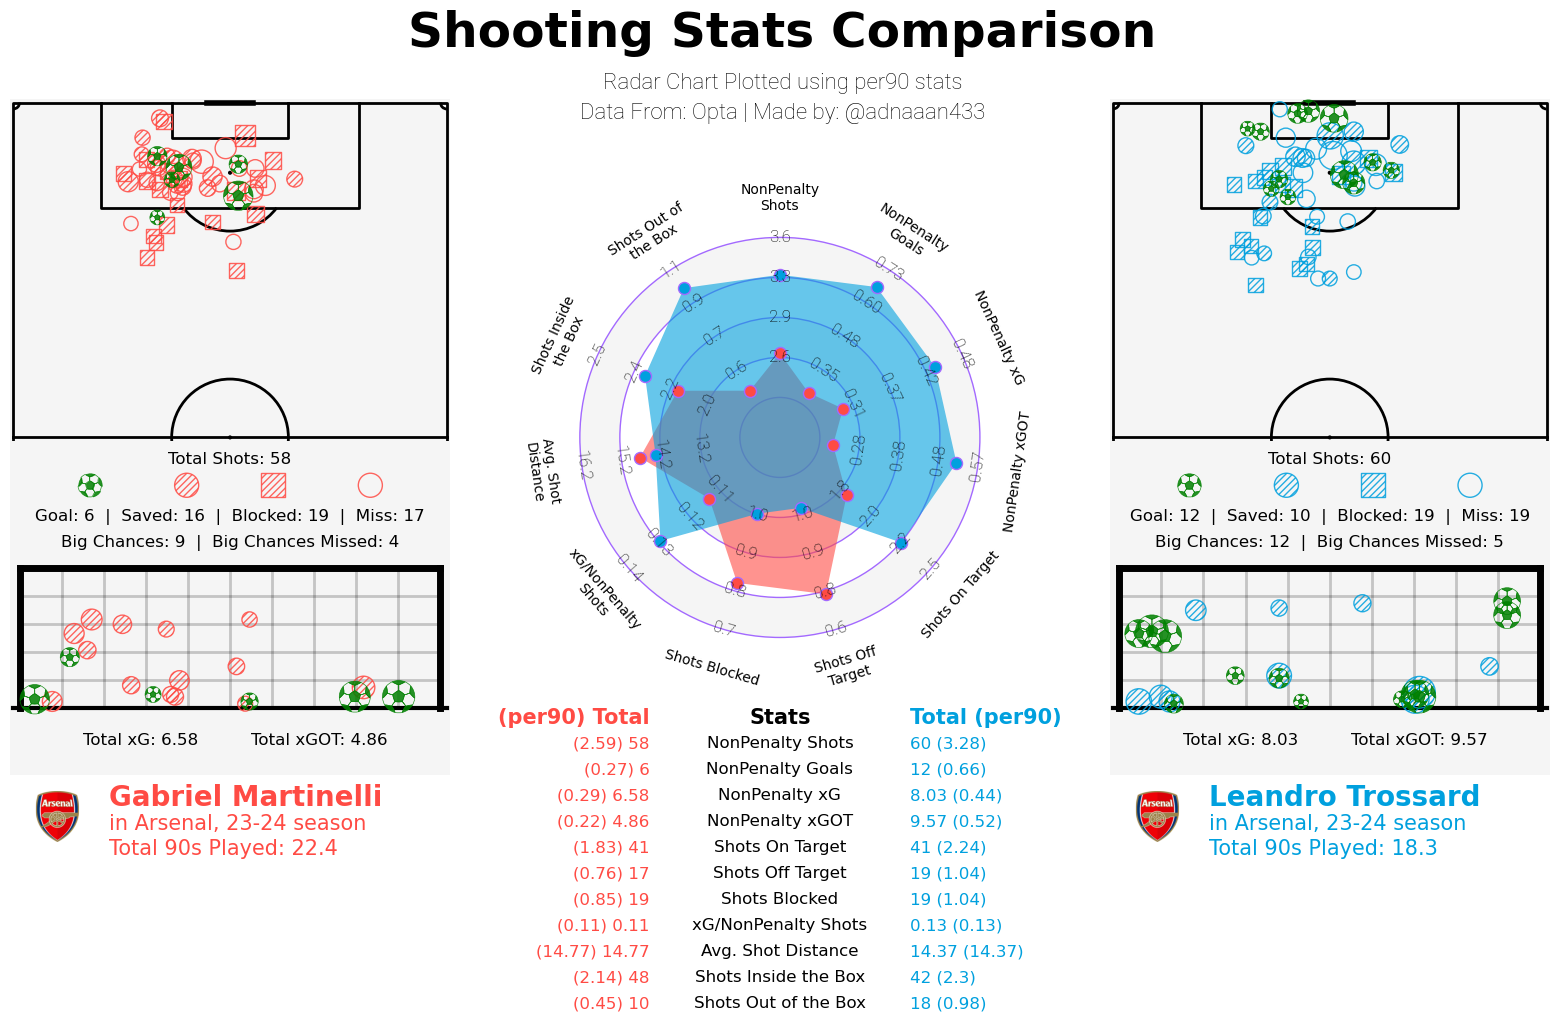

In [20]:
# Create a figure
fig = plt.figure(figsize=(16, 10))

# Add the first subplot with a 2:3 aspect ratio
ax1 = fig.add_subplot(131, aspect=2/3)
stats1 = Shooting(ax1, player_1, hcol, player_1_nts)

# Add the second subplot with a 2:2 aspect ratio
ax2 = fig.add_subplot(132, aspect=1)  # 2:2 aspect ratio is equivalent to 1 
# ax2.set_position([0.37, 1, 0.2, 0.2]) 
shooting_radar(ax2)


# Add the third subplot with a 2:3 aspect ratio
ax3 = fig.add_subplot(133, aspect=2/3)
stats2 = Shooting(ax3, player_2, acol, player_2_nts)

# Adjust layout to prevent overlap
plt.tight_layout()

fig.text(0.5, 0.95, 'Shooting Stats Comparison', fontsize=35, fontweight='bold', ha='center', va='center')
fig.text(0.5, 0.90, 'Radar Chart Plotted using per90 stats', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')
fig.text(0.5, 0.87, 'Data From: Opta | Made by: @adnaaan433', fontsize=16, fontproperties=robotto_thin.prop, ha='center', va='center')